# 수치형 변수

- 수치형변수 : 정수/실수. (집 값)
- 범주형변수 : 범주. (성별, 최종학위)
- 이진변수 : 참/거짓. (암 여부)

In [52]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [53]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter

In [54]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
simplefilter('ignore')

In [55]:
trn_file = "./input/movies/movies_train.csv"
seed = 42
dataFrame = pd.read_csv(trn_file, index_col=0)
print(dataFrame.shape)
dataFrame.head()

(600, 11)


,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
title,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [56]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     600 non-null    object 
 1   genre           600 non-null    object 
 2   release_time    600 non-null    object 
 3   time            600 non-null    int64  
 4   screening_rat   600 non-null    object 
 5   director        600 non-null    object 
 6   dir_prev_bfnum  270 non-null    float64
 7   dir_prev_num    600 non-null    int64  
 8   num_staff       600 non-null    int64  
 9   num_actor       600 non-null    int64  
 10  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 56.2+ KB


In [72]:
# 결측값 0으로 변환
dataFrame.fillna(0, inplace=True)
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 개들의 전쟁 to 베를린
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   distributor     600 non-null    object        
 1   genre           600 non-null    object        
 2   release_time    600 non-null    datetime64[ns]
 3   time            600 non-null    int64         
 4   screening_rat   600 non-null    object        
 5   director        600 non-null    object        
 6   dir_prev_bfnum  600 non-null    float64       
 7   dir_prev_num    600 non-null    int64         
 8   num_staff       600 non-null    int64         
 9   num_actor       600 non-null    int64         
 10  box_off_num     600 non-null    int64         
 11  year            600 non-null    int64         
 12  month           600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory usage: 65.6+ KB


In [73]:
dataFrame.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05,2012.748333,7.011667
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06,1.727224,3.394712
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,2010.000000,1.000000
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03,2011.000000,4.000000
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04,2013.000000,7.000000
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05,2014.000000,10.000000
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07,2015.000000,12.000000


In [74]:
target_col = 'box_off_num'
pred_col = 'pred'
num_cols = [x for x in dataFrame.columns if dataFrame[x].dtype in [np.int64, np.float64] and x != target_col]
print(num_cols)

['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff', 'num_actor', 'year', 'month']


# 수치형변수 - 날짜/시간
- 날짜/시간 변수는 pd.to_datetime()으로 문자열에서 datetime 타입으로 변환 후, 시/일/주/월/년 등의 변수를 추출한다.

In [75]:
dataFrame['release_time'] = pd.to_datetime(dataFrame['release_time'])
dataFrame['release_time'].describe()

count                     600
unique                    330
top       2015-08-13 00:00:00
freq                        6
first     2010-01-02 00:00:00
last      2015-12-31 00:00:00
Name: release_time, dtype: object

In [76]:
dataFrame['year'] = dataFrame['release_time'].dt.year
dataFrame['month'] = dataFrame['release_time'].dt.month
dataFrame.head()

,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
title,,,,,,,,,,,,,
개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012,11
내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015,11
은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013,6
나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012,7
불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010,11


<AxesSubplot:>

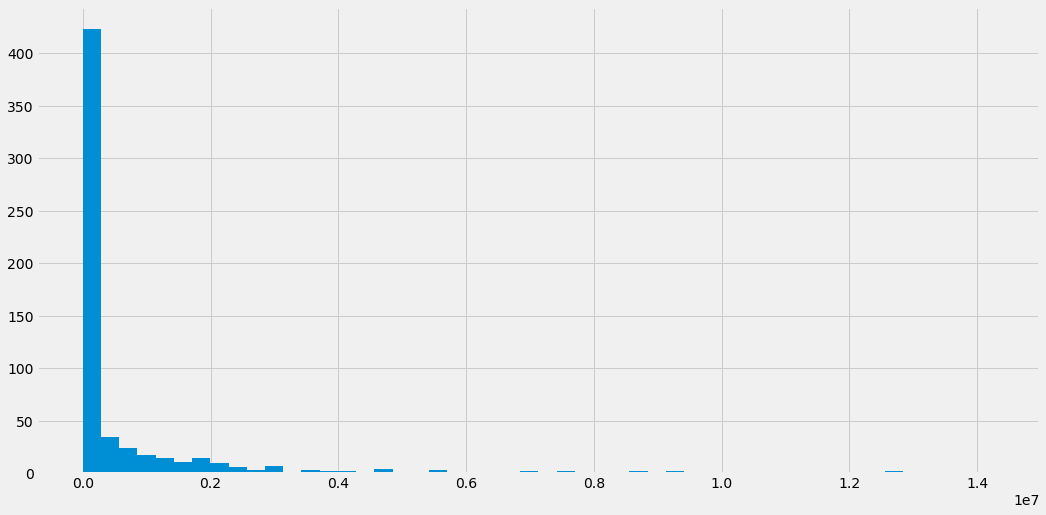

In [62]:
dataFrame.box_off_num.hist(bins=50)

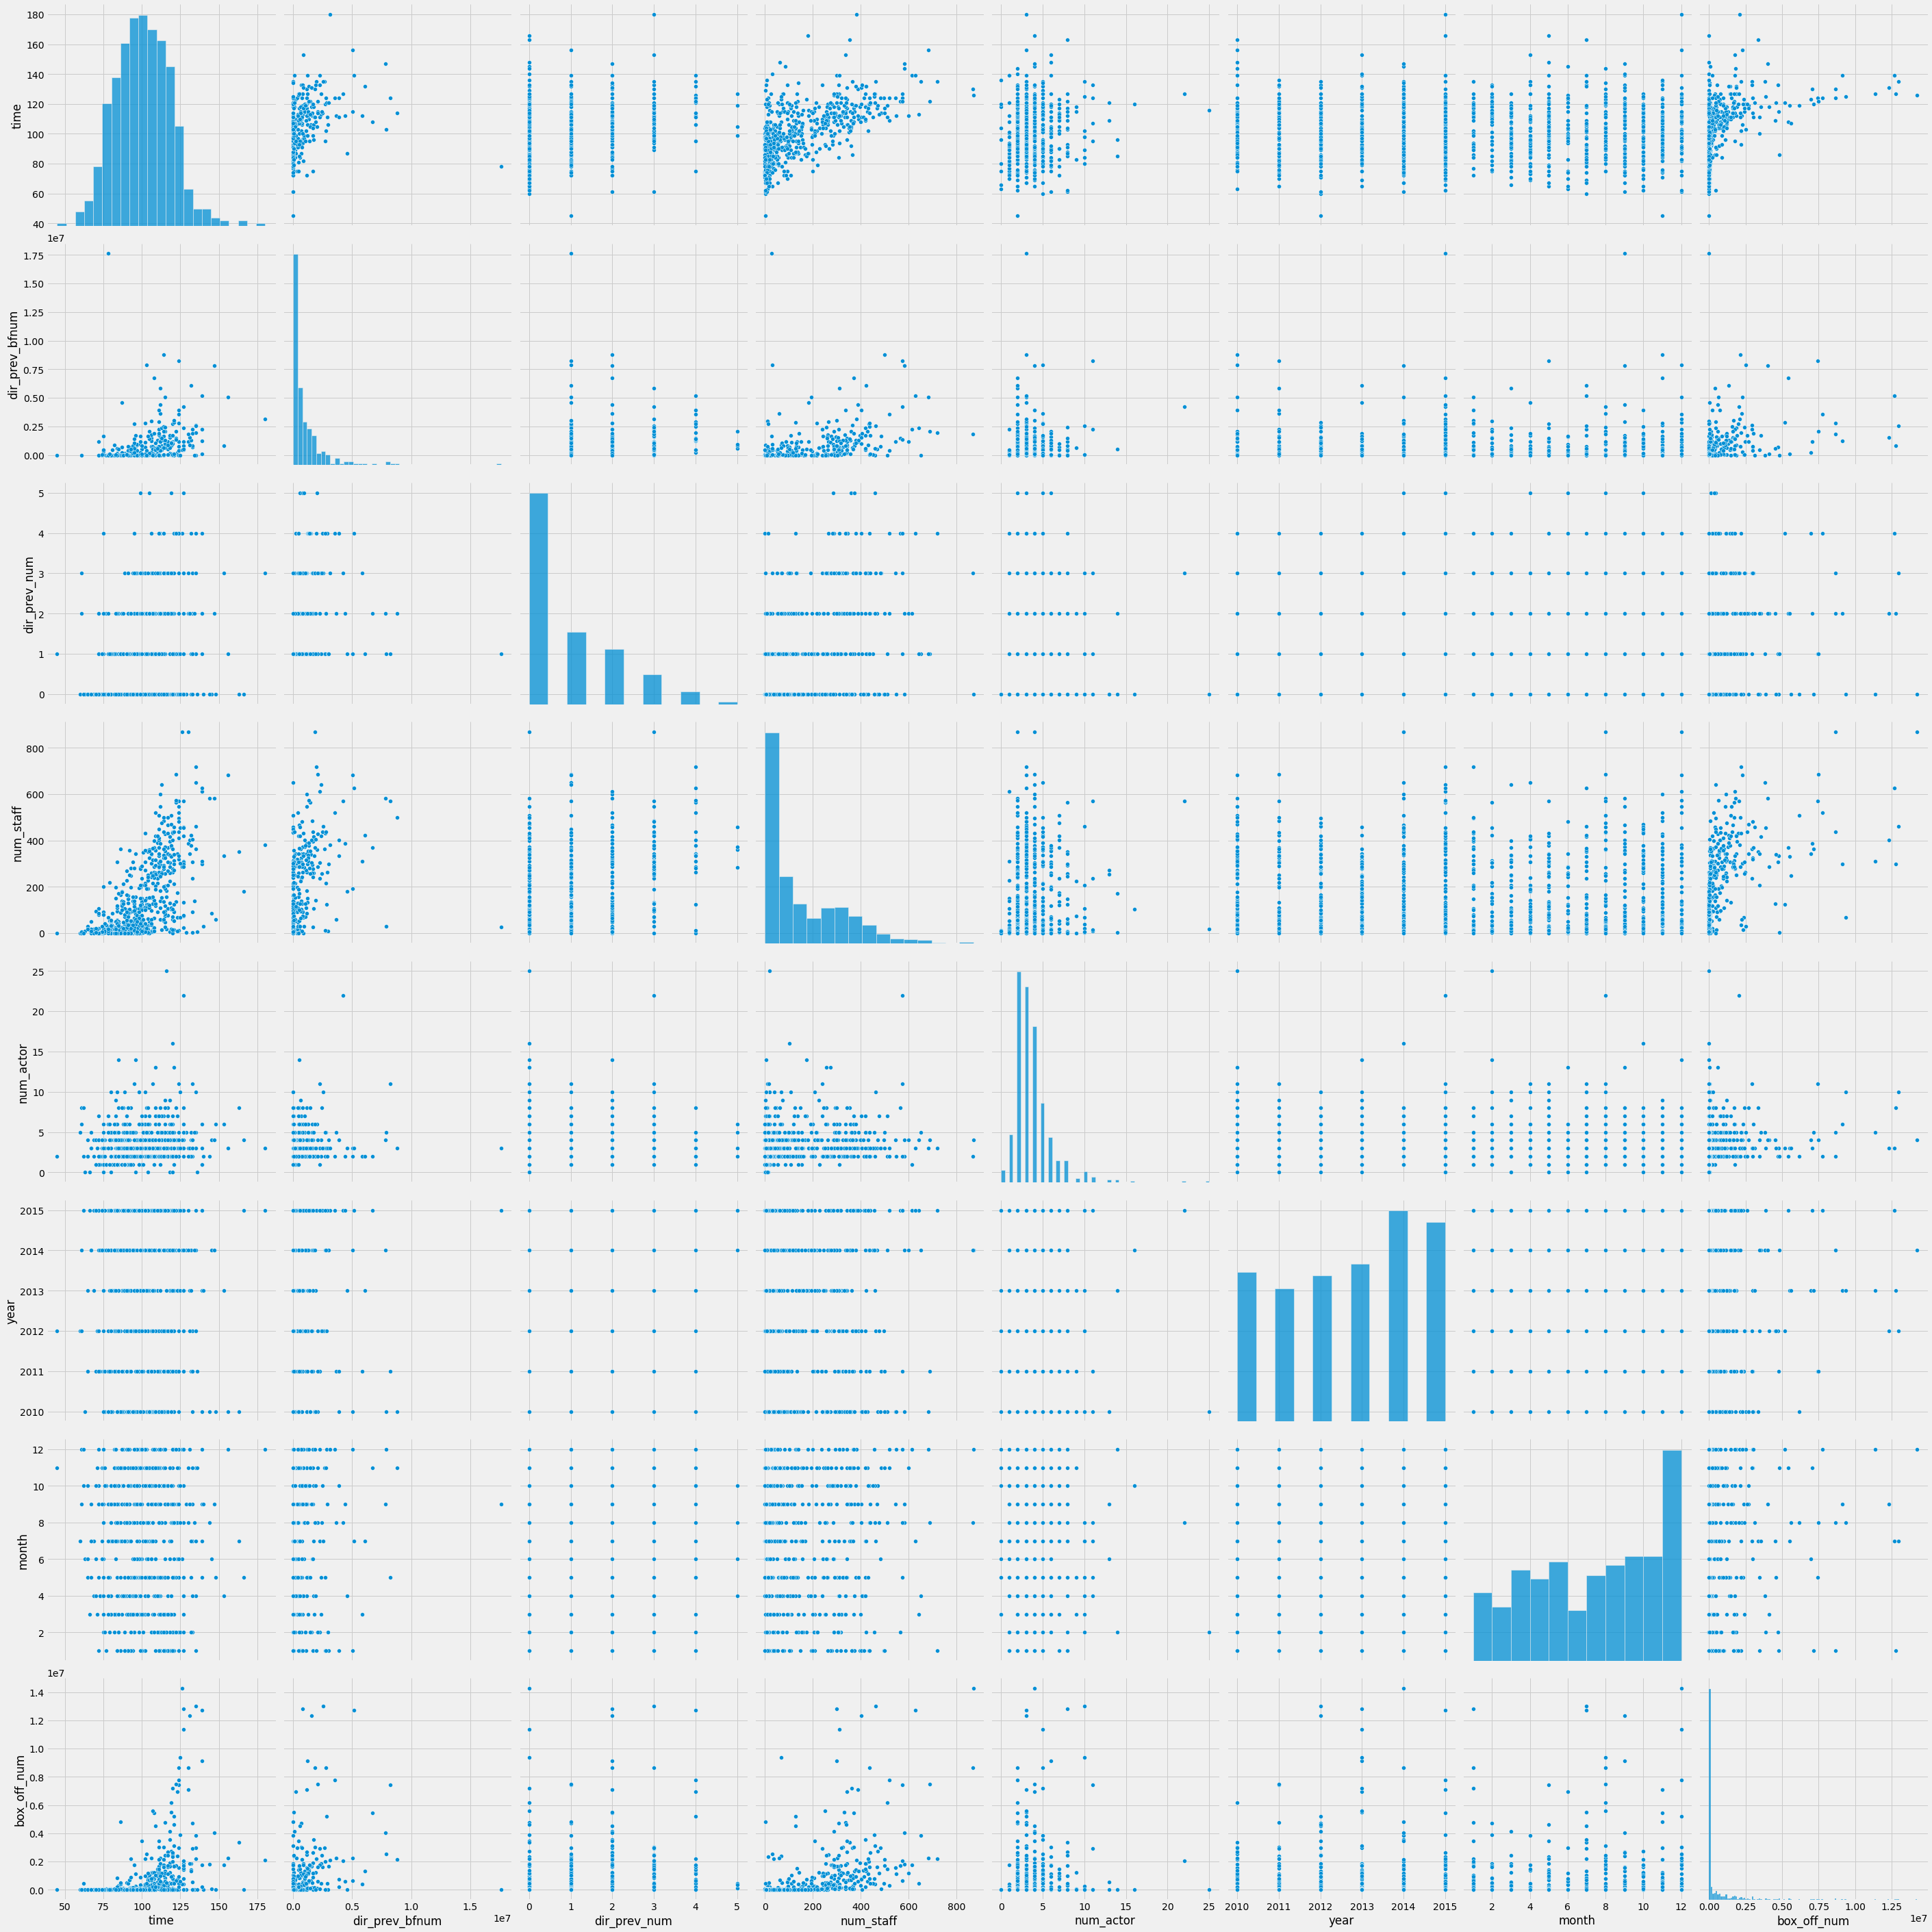

In [63]:
sns.pairplot(data=dataFrame, vars=num_cols + [target_col], size=5)

**수치형변수 중 time은 정규분포에 가깝고 나머지는 멱함수 (power-law)분포에 가깝다.**

In [65]:
dataFrame.corr().style.background_gradient()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year,month
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452,-0.062575,-0.023969
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184,-0.002137,0.064117
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674,0.132621,0.034019
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265,-0.032891,-0.002841
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179,-0.098869,-0.015063
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000,-0.002497,0.019104
year,-0.062575,-0.002137,0.132621,-0.032891,-0.098869,-0.002497,1.000000,0.046627
month,-0.023969,0.064117,0.034019,-0.002841,-0.015063,0.019104,0.046627,1.000000


### RMSE/RMLSE 손실함수 정의

In [78]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y, p))
rmlse = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y), np.log1p(p)))

### 변수 가공없이 선형회귀 모델 학습

In [79]:
lr = LinearRegression()
lr.fit(dataFrame[num_cols], dataFrame[target_col])
dataFrame[pred_col] = lr.predict(dataFrame[num_cols])

print(f' RMSE:\t{rmse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')

 RMSE:	  1498916.42


**멱함수 분포의 종속변수를 그대로 선형회귀 모델 학습에 사용한 경우,  
예측값에 음수가 존재하고 적은 값 예측에 오차가 많이 발생한다.**

In [81]:
rmse = lambda y, p: np.sqrt(mean_squared_error(y, p))

lr = LinearRegression()
lr.fit(dataFrame[num_cols], dataFrame[target_col])
dataFrame[pred_col] = lr.predict(dataFrame[num_cols])

print(f' RMSE:\t{rmse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')

 RMSE:	  1498916.42


**멱함수 분포의 수치형변수는 np.log1p()함수로 정규분포에 가깝게 변환할 수 있다.  
역변환은 np.expm1() 함수를 이용하면 된다.**

In [83]:
rmlse = lambda y, p: np.sqrt(mean_squared_error(np.log1p(y), np.log1p(p)))

lr = LinearRegression()
lr.fit(dataFrame[num_cols], np.log1p(dataFrame[target_col]))
dataFrame[pred_col] = np.expm1(lr.predict(dataFrame[num_cols]))

print(f' RMSE:\t{rmse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')
print(f' RMLSE:\t{rmlse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')

 RMSE:	 15245831.69
 RMLSE:	        2.11


# 수치형 변수 - 스케일링
- 알고리즘에 따라 수치형변수를 스케일링/정규분포화 할 수 있다.  
- 선형회귀/ 결정트리 류의 알고리즘에서는 도움이 되지 않는다.
- 뉴런 알고리즘 사용시에 사용하면 좋다. (거의 필수)
- 비선형 알고리즘에서도 어느정도 도움이 된다.

In [84]:
#스케일링 함수 StandardScaler와 MinMaxScaler 많이 사용함
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  
X = scaler.fit_transform(dataFrame[num_cols])  #정규화로 변환

lr = LinearRegression()  
lr.fit(X, np.log1p(dataFrame[target_col]))  
dataFrame[pred_col] = np.expm1(lr.predict(X))  

print(f' RMSE:\t{rmse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')  
print(f' RMLSE:\t{rmlse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')  

 RMSE:	 15245831.69
 RMLSE:	        2.11


In [85]:
#미니멈과 맥시멈 값을 0하고 1로 고정시켜줌
scaler = MinMaxScaler()  
X = scaler.fit_transform(dataFrame[num_cols])  

lr = LinearRegression()  
lr.fit(X, np.log1p(dataFrame[target_col]))  
dataFrame[pred_col] = np.expm1(lr.predict(X))  

print(f' RMSE:\t{rmse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')
print(f' RMLSE:\t{rmlse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')

 RMSE:	 15245831.69
 RMLSE:	        2.11


# 수치형변수 - Binning

- 수치형변수는 Binning을 통해 범주형변수로 변환할 수 있다.
- 수치데이터가 비선형으로 종속 변수와 관련 있을 때 사용하면 좋다.

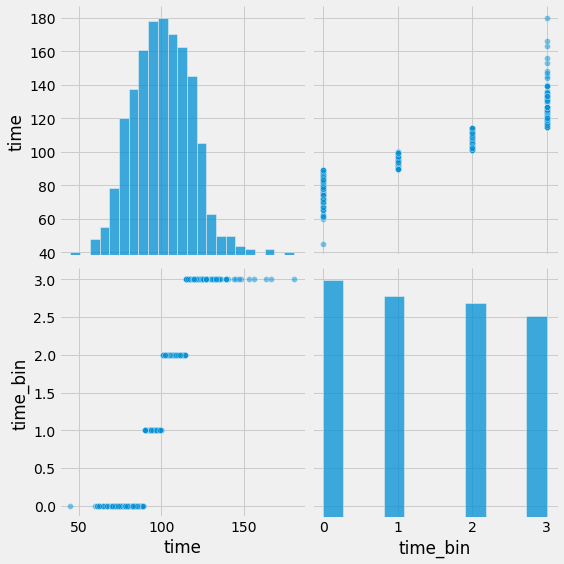

In [31]:
dataFrame['time_bin'] = pd.qcut(dataFrame['time'], 4, labels=False)
sns.pairplot(data=dataFrame, vars=['time', 'time_bin'], size=4, plot_kws={'alpha':.5})

In [91]:
X = pd.concat([dataFrame[[x for x in num_cols if x !='month']],
              pd.get_dummies(pd.qcut(dataFrame['time'], 4, labels=False)),
              pd.get_dummies(dataFrame['month'])], axis=1)

dataFrame['time_bin'] = pd.qcut(dataFrame['time'], 4, labels=False)
dataFrame[['time', 'time_bin']].head(10)

,time,time_bin
title,,
개들의 전쟁,96,1
내부자들,130,3
은밀하게 위대하게,123,3
나는 공무원이다,101,2
불량남녀,108,2
강철대오 : 구국의 철가방,113,2
길위에서,104,2
회사원,96,1
"1789, 바스티유의 연인들",129,3


In [92]:
X = pd.concat([dataFrame[num_cols], pd.get_dummies(pd.qcut(dataFrame['time'], 4, labels=False))], axis=1)
X.shape

(600, 11)

In [94]:
lr = LinearRegression()
lr.fit(X, np.log1p(dataFrame[target_col]))
dataFrame[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')

 RMSE:	 10033815.43
RMLSE:	        2.08


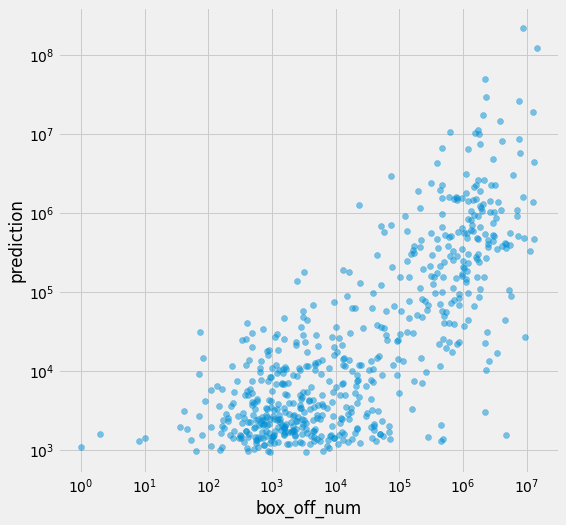

In [96]:
plt.figure(figsize=(8, 8))
plt.scatter(dataFrame[target_col], dataFrame[pred_col], alpha=.5)
plt.xlabel('box_off_num')
plt.ylabel('prediction')
plt.yscale('log')
plt.xscale('log')

# 수치형변수 - 다항회귀
- 다항회귀(Polynomial Regression)는 [1, x1, x2, x1 * x2, x1 ^2, x2 ^2,...] 의 변수를 생성한다.
- 오버피팅/과적합의 위험이 있다.
- 객체 생성시 2 이상은 사용하지 않는게 좋다.

In [97]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X = poly.fit_transform(dataFrame[num_cols])
print(X.shape)

lr = LinearRegression()  
lr.fit(X, np.log1p(dataFrame[target_col]))  
dataFrame[pred_col] = np.expm1(lr.predict(X)) 

print(f' RMSE:\t{rmse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')
print(f' RMLSE:\t{rmlse(dataFrame[target_col], dataFrame[pred_col]):12.2f}')

(600, 36)
 RMSE:	  1983379.89
 RMLSE:	        1.98
